# 最小二乗法

<iframe width="560" height="315" src="https://www.youtube.com/embed/KKuAxQbuJpk" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [1]:
# Google　Colaboratory で実行する場合はインストールする
if str(get_ipython()).startswith("<google.colab."):
    !pip install japanize_matplotlib

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [3]:
# 表示する文字サイズを調整
plt.rc("font", size=20)
plt.rc("legend", fontsize=16)
plt.rc("xtick", labelsize=14)
plt.rc("ytick", labelsize=14)

# 乱数
np.random.seed(777)

```{note}
- `japanize_matplotlib` はグラフに日本語を表示するためにインポートしています。
- `plt.rc("font", size=20)`などの指定はグラフに表示する文字を大きくするための設定です。
- `np.random.seed(777)`は乱数を固定するために指定しています。
```

## 実験用の回帰データを作成
`sklearn.datasets.make_regression` を使ってデータを作成します。

```{hint}
[sklearn.datasets.make_regression](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html)
```

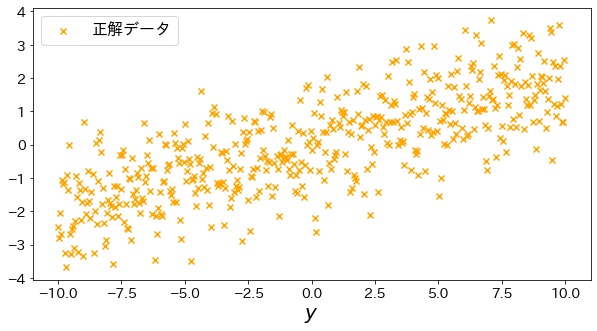

In [4]:
# 訓練データ
n_samples = 500
X = np.linspace(-10, 10, n_samples)[:, np.newaxis]
epsolon = np.random.normal(size=n_samples)
y = np.linspace(-2, 2, n_samples) + epsolon

# 直線を可視化
plt.figure(figsize=(10, 5))
plt.scatter(X, y, marker="x", label="正解データ", c="orange")
plt.xlabel("$x_1$")
plt.xlabel("$y$")
plt.legend()
plt.show()

## yに乗っているノイズの確認

`y = np.linspace(-2, 2, n_samples) + epsolon` の `epsolon` のヒストグラムをプロットします。
正規分布に近い分布のノイズが目的変数に乗っていることを確認します。

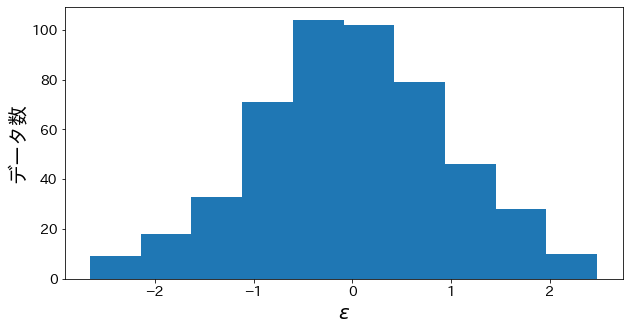

In [5]:
plt.figure(figsize=(10, 5))
plt.hist(epsolon)
plt.xlabel("$\epsilon$")
plt.ylabel("データ数")
plt.show()

## 最小二乗法で直線を当てはめる

```{hint}
[sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
```

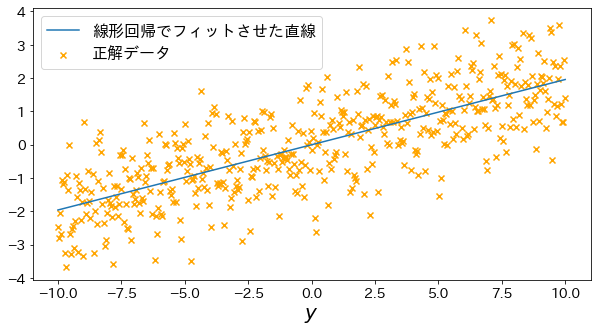

In [6]:
# モデルをフィット
lin_r = make_pipeline(StandardScaler(with_mean=False), LinearRegression()).fit(X, y)
y_pred = lin_r.predict(X)

# 直線を可視化
plt.figure(figsize=(10, 5))
plt.scatter(X, y, marker="x", label="正解データ", c="orange")
plt.plot(X, y_pred, label="線形回帰でフィットさせた直線")
plt.xlabel("$x_1$")
plt.xlabel("$y$")
plt.legend()
plt.show()